In [10]:
import numpy as np
import sqlite3
import msgpack
import pandas as pd
from datetime import date

BIN_WIDTH = 50
N_NEURONS = 96

'''
Read data from sqlite database
'''
conn = sqlite3.connect('experiment.db')
cursor = conn.cursor()
z_t = []
v_t = []
for row in cursor.execute('SELECT * FROM signals_table'):
    if msgpack.unpackb(row[2], use_list=False)[4]: # [targ_x targ_y cursor_x cursor_y   trial   sound]
        z_t += [msgpack.unpackb(row[0], use_list=False)]
        v_t += [msgpack.unpackb(row[1], use_list=False)]
conn.close()

z = np.zeros((len(z_t), len(z_t[0])))
v = np.zeros((len(v_t), len(v_t[0])))

for i in range(len(z_t)):
    z[i] = np.array(z_t[i])
    v[i] = np.array(v_t[i])


'''
Create pandas DataFrame and bin data
'''
d = { 'x' : v[:,0], 'y' : v[:,1]} # want 98 columns
for i in range(len(z[0])):
    d[str(i)] = z[:,i]

raw = pd.DataFrame(data=d) # delta time index

idx = pd.TimedeltaIndex(raw.index, unit='ms')
raw = raw.set_index(idx)

ms = str(BIN_WIDTH) + 'ms'
df = pd.DataFrame()

z_idxs = [str(i) for i in range(N_NEURONS)]
for i in z_idxs:
    df[i] = raw[i].resample(ms).sum()
    
df['x'] = raw['x'].resample(ms).mean()
df['y'] = raw['y'].resample(ms).mean()

In [14]:
df['x'].mean()

0.000494476158581473

In [15]:
df['y'].mean()

-0.00018734916966623233

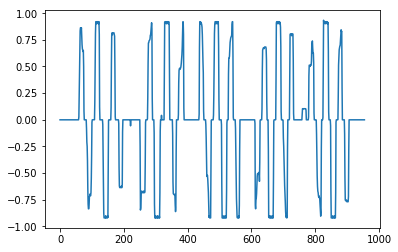

In [19]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(df['y'])),df['y'])